# Assignment-3 
Task 1 - Text Classification
Movie Review Classification

In [1]:
import numpy as np
import tensorflow as tf
from gensim.models import Word2Vec
from nltk.corpus import brown
from keras.layers.core import Activation, Dense, Dropout, SpatialDropout1D
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM
from keras.layers import Bidirectional
from keras.models import Sequential
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers import Flatten
from sklearn.model_selection import train_test_split
import collections
import matplotlib.pyplot as plt
import nltk
import numpy as np
import os
from nltk.corpus import stopwords

C:\Users\hasik\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
C:\Users\hasik\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
Using TensorFlow backend.


Generating the corpus

In [2]:
DATA_DIR = os.getcwd()

In [3]:
#Writing in the training file 
def write_file(file_name,line):
    with open(file_name,'a',encoding="utf-8" ) as fileWrite:
        fileWrite.write( line)
        fileWrite.write('\n')

In [4]:
file_name='trainfile1.txt'

In [5]:
def clean_file(file_name):
    fileRead=open(file_name,'w').close()
    
clean_file(file_name)

In [6]:
pos_train_dir=os.path.join(DATA_DIR,'train','pos')
neg_train_dir=os.path.join(DATA_DIR,'train','neg')
pos_test_dir=os.path.join(DATA_DIR,'test','pos')
neg_test_dir=os.path.join(DATA_DIR,'test','neg')
clean_file(file_name)
for file in os.listdir(pos_train_dir):
    with open(os.path.join(pos_train_dir,file),'r', encoding = "utf-8") as fileRead:
        line=fileRead.read()
        write_file(file_name,line+'\t'+str(1))
for file in os.listdir(neg_train_dir):
    with open(os.path.join(neg_train_dir,file),'r', encoding = "utf-8") as fileRead:
        line=fileRead.read()
        write_file(file_name,line+'\t'+str(0))
for file in os.listdir(pos_test_dir):
    with open(os.path.join(pos_test_dir,file),'r', encoding = "utf-8") as fileRead:
        line=fileRead.read()
        write_file(file_name,line+'\t'+str(1))
for file in os.listdir(neg_test_dir):
    with open(os.path.join(neg_test_dir,file),'r', encoding = "utf-8") as fileRead:
        line=fileRead.read()
        write_file(file_name,line+'\t'+str(0))
# write_file('train_file.txt')

Generating the Word frequencies

In [7]:
maxlen = 0
word_freqs = collections.Counter()
num_recs = 0
ftrain = open(os.path.join(DATA_DIR, "trainfile1.txt"), 'rb')
#stopwords_list=stopwords.words("english")
for line in ftrain:
    #words=[]
    sentence,label=line.strip()[:-2],line.strip()[-1]
    words = nltk.word_tokenize(sentence.decode("ascii", "ignore").lower())
#     for word in words:
# #             word = word.lower() # in case they arenet all lower cased
#         if word not in stopwords.words("english"):
#     for item in words_temp:
#         if item not in stopwords_list:
#             words.append(item)          
    if len(words) > maxlen:
        maxlen = len(words)
    for word in words:
        word_freqs[word] += 1
    num_recs += 1
ftrain.close()

Creating Word2index

In [8]:
MAX_FEATURES = 2000 
MAX_SENTENCE_LENGTH = 500
vocab_size = min(MAX_FEATURES, len(word_freqs)) + 2
word2index = {x[0]: i+2 for i, x in
enumerate(word_freqs.most_common(MAX_FEATURES))}
word2index["PAD"] = 0
word2index["UNK"] = 1
index2word = {v:k for k, v in word2index.items()}

Collecting labels

In [9]:
labels=[]
file_name="trainfile1.txt"
file_path=DATA_DIR
with open(os.path.join(file_path,file_name),'r',encoding = "utf-8") as fileRead:
    for line in fileRead:
        l=line.strip()[-1]
        labels.append(l)
label_set_list=list(set(labels))
nos_labels=len(label_set_list)

Creating input and output vectors.

In [10]:
X = np.empty((num_recs, ), dtype=list)
y = np.zeros(( num_recs, nos_labels))
# print(y)
i = 0
ftrain = open(os.path.join(DATA_DIR, "trainfile1.txt"), 'r',encoding="utf-8")
for line in ftrain:
    sentence,label=line.strip()[:-2],line.strip()[-1]
    words = nltk.word_tokenize(sentence.lower())
    label=label.lower()
    seqs = []
    dummy_vec=[0]*nos_labels
    for word in words:
        if word in word2index:
            seqs.append(word2index[word])
        else:
            seqs.append(word2index["UNK"])
    X[i] = seqs
    dummy_vec[label_set_list.index(label)]=1
    y[i]=dummy_vec    
    i+=1
ftrain.close()
X = sequence.pad_sequences(X, maxlen=MAX_SENTENCE_LENGTH)


In [11]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)


Generating the CNN Model

In [12]:
model = Sequential()
model.add(Embedding(vocab_size, 32, input_length=MAX_SENTENCE_LENGTH))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
# model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           64064     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               2000250   
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 502       
Total params: 2,067,920
Trainable params: 2,067,920
Non-trainable params: 0
_________________________________________________________________


Training the model

In [13]:
# Fit the model
history=model.fit(Xtrain, ytrain, validation_data=(Xtest, ytest), epochs=2, batch_size=32)

# Final evaluation of the model
scores = model.evaluate(Xtest, ytest,verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 40000 samples, validate on 10000 samples
Epoch 1/2
40000/40000 [==============================] - 104s 3ms/step - loss: 0.3591 - acc: 0.8293 - val_loss: 0.2833 - val_acc: 0.8842
Epoch 2/2
40000/40000 [==============================] - 103s 3ms/step - loss: 0.2443 - acc: 0.9005 - val_loss: 0.2662 - val_acc: 0.8927
Accuracy: 89.27%


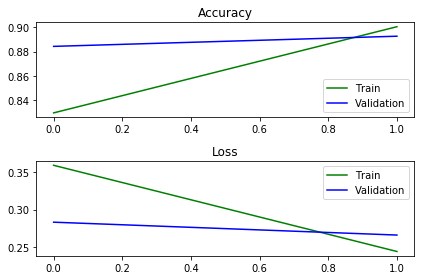

In [14]:
#Plotting the model.
plt.subplot(211)
plt.title("Accuracy")
plt.plot(history.history["acc"], color="g", label="Train")
plt.plot(history.history["val_acc"], color="b", label="Validation")
plt.legend(loc="best")
plt.subplot(212)
plt.title("Loss")
plt.plot(history.history["loss"], color="g", label="Train")
plt.plot(history.history["val_loss"], color="b", label="Validation")
plt.legend(loc="best")
plt.tight_layout()
plt.show()